In [1]:
import pandas as pd
import numpy as np

In [2]:
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import geopandas as gpd

In [4]:
df_ = pd.read_csv("contactdbexport.csv")#"SC-List.csv")

In [5]:
df_.columns

Index(['First Name', 'Last Name', 'Email', 'Telephone', 'Company',
       'Contact Category', 'Role', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [6]:
df_.head()

,First Name,Last Name,Email,Telephone,Company,Contact Category,Role,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Ghaleb,Abdulla,abdulla1@llnl.gov,925-423-5947,Lawrence Livermore National Laboratory,Transients,Member,NaN,NaN,NaN,NaN,NaN,NaN
1,Paul Alexander,Abell,paul.a.abell@nasa.gov,281-483-0293,NASA Johnson Space Center,Solar System,Member,NaN,NaN,NaN,NaN,NaN,NaN
2,Eric,Agol,agol@astro.washington.edu,NaN,University of Washington,Transients,Member,NaN,NaN,NaN,NaN,NaN,NaN
3,Eric,Agol,agol@astro.washington.edu,NaN,University of Washington,Strong Lensing,Affiliate,NaN,NaN,NaN,NaN,NaN,NaN
4,Michel,Aguena,aguena@if.usp.br,NaN,NaN,DESC,Member,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_["Contact Category"].unique()

array(['Transients', 'Solar System', 'Strong Lensing', 'DESC', 'Galaxies',
       'AGN', 'Stars', ' Milky Way and Local Volume',
       'Statistics and Informatics', 'DESC ',
       ' Milky Way and Local Volume ', 'Statistics and Informatics ',
       'Galaxies ', 'Transients '], dtype=object)

In [9]:
df_["Contact Category"] =\
    df_["Contact Category"].apply(lambda x:x.strip())

df_.ix[df_["Contact Category"] == 'Stars', "Contact Category"] = 'Stars, Milky Way, and Local Volume'
df_.ix[df_["Contact Category"] == 
             'Milky Way and Local Volume', "Contact Category"] = 'Stars, Milky Way, and Local Volume'

df_ = df_[~(
        (df_["Contact Category"] == 'Weak Lensing') | 
             (df_["Contact Category"] == 'Supernovae'))]
df_.describe()

/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_["SC"] = df_["Contact Category"].apply(lambda x : 
                                         x.strip().lstrip())

In [11]:
df_[["Email", "SC"]].drop_duplicates().groupby("SC").count()

,Email
SC,
AGN,54
DESC,169
Galaxies,106
Solar System,94
"Stars, Milky Way, and Local Volume",237
Statistics and Informatics,70
Strong Lensing,43
Transients,194


In [12]:
df_[["Email", "SC"]].drop_duplicates().groupby("SC").count().reset_index()#.plot(kind="bar")

,SC,Email
0,AGN,54
1,DESC,169
2,Galaxies,106
3,Solar System,94
4,"Stars, Milky Way, and Local Volume",237
5,Statistics and Informatics,70
6,Strong Lensing,43
7,Transients,194


In [12]:
df_['First'] = df_['First Name']
df_['Last'] = df_['Last Name']
df_["firstlast"] = df_['First']  + df_['Last']
df_.firstlast.unique().size

778

In [13]:
newnames = {"DESC":"Dark Energy (DESC)",
           "Milky Way and Local Volume":"Stars, Milky Way, Local Volume",
           "Statistics and Informatics":"Informatics and Statistics",
           "Transients": "Transients and Variable Stars"}



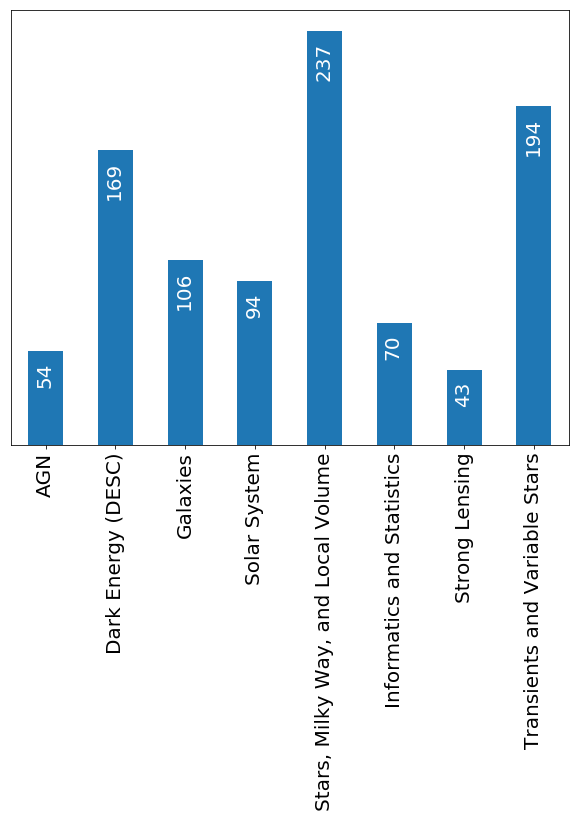

In [14]:

tmp = df_[["Email", "SC"]].drop_duplicates().groupby("SC").count().rename(newnames)
ax = tmp.plot(kind="bar", legend=False, figsize=(10,8), fontsize=20, rot=90, 
              )

ax.set_yticks([])
#ax.set_xticks(ax.g)
for p in ax.patches:
    b = p.get_bbox()
    val = "{:d}".format(int(b.y1 + b.y0))
    ax.annotate(val, ((b.x0 + b.x1)/2 + -0.15, b.y1 + -15), rotation=90, 
                color="w", fontsize=20)
ax.set_xlabel("")
pl.savefig("SCbars.png")

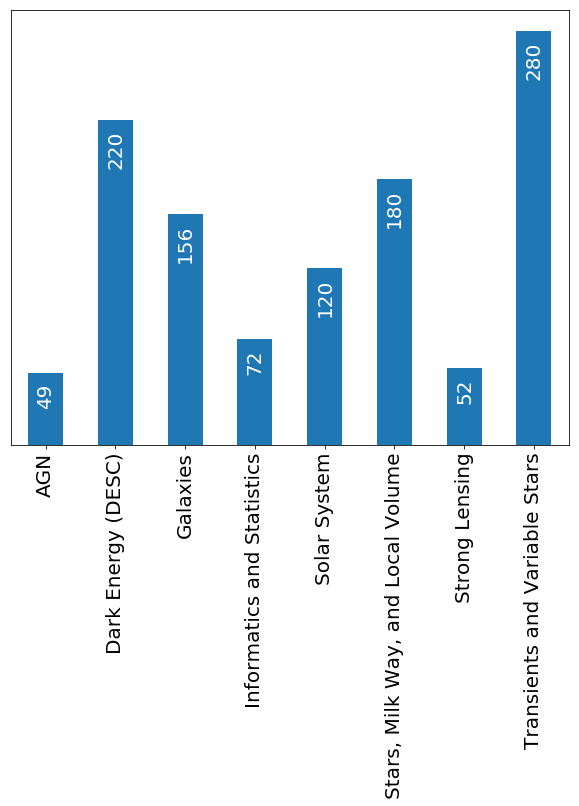

In [15]:

sccounts = pd.DataFrame.from_dict(
    {"AGN": 49,
    "Dark Energy (DESC)": 220,
     "Galaxies": 156,
   "Informatics and Statistics": 72,
      "Solar System": 120,
   "Stars, Milk Way, and Local Volume": 180,
     "Strong Lensing": 52,
  "Transients and Variable Stars": 280, }, orient="index")

ax = sccounts.plot(kind="bar", legend=False, figsize=(10,8), fontsize=20, rot=90, 
              )

ax.set_yticks([])
#ax.set_xticks(ax.g)
for p in ax.patches:
    b = p.get_bbox()
    val = "{:d}".format(int(b.y1 + b.y0))
    ax.annotate(val, ((b.x0 + b.x1)/2 - 0.13, b.y1 + -17), rotation=90, color="w", fontsize=20)
ax.set_xlabel("")
pl.savefig("SCbars.png")

2029

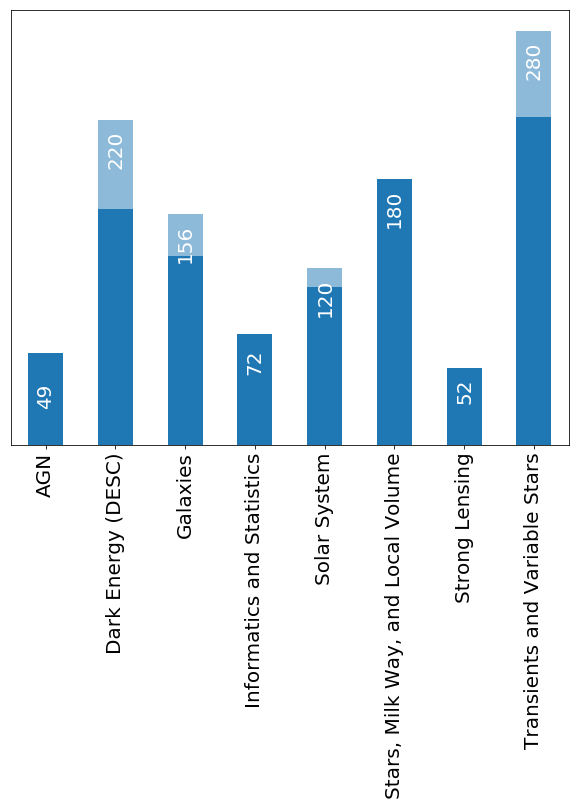

In [16]:
sccounts0 = pd.DataFrame.from_dict(
    {"AGN": 49,
    "Dark Energy (DESC)": 220,
     "Galaxies": 156,
   "Informatics and Statistics": 72,
      "Solar System": 120,
   "Stars, Milk Way, and Local Volume": 180,
     "Strong Lensing": 52,
  "Transients and Variable Stars": 280, }, orient="index")
allmembers = np.sum(np.array(list(sccounts0.values)))

ax = sccounts0.plot(kind="bar", legend=False, figsize=(10,8), fontsize=20, rot=90, alpha=0.5)
ax.set_yticks([])
#ax.set_xticks(ax.g)
for p in ax.patches:
    b = p.get_bbox()
    val = "{:d}".format(int(b.y1 + b.y0))
    ax.annotate(val, ((b.x0 + b.x1)/2 - 0.13, b.y1 + -17), rotation=90, color="w", fontsize=20)
ax.set_xlabel("")

sccounts = pd.DataFrame.from_dict(
    {"AGN": 62,
    "Dark Energy (DESC)": 160,
     "Galaxies": 128,
   "Informatics and Statistics": 75,
      "Solar System": 107,
   "Stars, Milk Way, and Local Volume": 180,
     "Strong Lensing": 52,
  "Transients and Variable Stars": 222, }, orient="index")
sccounts.plot(kind="bar", legend=False, figsize=(10,8), fontsize=20, rot=90, 
              ax=ax)

pl.savefig("SCbars.png")
allmembers + 900

In [17]:
tvsdf = pd.read_csv("LSST_TVS_subgroups - Sheet1.csv")[
    ["last name","first name","affiliation","email"]].rename(
    {"first name":"First Name",
    "last name":"Last Name",
    "email":"Email",
    "affiliation":"Company"}, axis=1)
tvsdf["SC"] = ["TVS"] * len(tvsdf)
tvsmerged = pd.concat([tvsdf,df_[["First Name",
    "Last Name",
    "Email",
    "SC"]]]).drop_duplicates()
tvsmerged1 = tvsmerged[~(tvsmerged.SC == "Transients")]
tvsmerged1.shape, tvsmerged.shape

/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


((1010, 5), (1204, 5))

In [18]:
tvsmerged1["SC"] = tvsmerged1["SC"].map(lambda x: x.replace("TVS", 
                                "Transients and Variable Stars"))

/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
desc = pd.read_csv("DESCcontactList.csv")
desc
desc["First Name"] = desc.Name.map(lambda x: x.split()[0])
desc["Last Name"] = desc.Name.map(lambda x: ' '.join(x.split()[1:]))
desc["SC"] = ["DESC"] * len(desc)
desc["Email"] = [""] * len(desc)
desc["Company"] = [""] * len(desc)
desc = desc[["First Name","Last Name","SC", "Email", "Company"]]
desc

,First Name,Last Name,SC,Email,Company
0,Michel,Aguena,DESC,,
1,Greg,Aldering,DESC,,
2,Steven,Allen,DESC,,
3,Husni,Almoubayyed,DESC,,
4,David,Alonso,DESC,,
5,Reza,Ansari,DESC,,
6,Pierre,Antilogus,DESC,,
7,Pierre,Astier,DESC,,
8,Eric,Aubourg,DESC,,
9,Camille,Avestruz,DESC,,


In [20]:
df_.head()


,First Name,Last Name,Email,Telephone,Company,Contact Category,Role,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,SC,First,Last,firstlast
0,Ghaleb,Abdulla,abdulla1@llnl.gov,925-423-5947,Lawrence Livermore National Laboratory,Transients,Member,NaN,NaN,NaN,NaN,NaN,NaN,Transients,Ghaleb,Abdulla,GhalebAbdulla
1,Paul Alexander,Abell,paul.a.abell@nasa.gov,281-483-0293,NASA Johnson Space Center,Solar System,Member,NaN,NaN,NaN,NaN,NaN,NaN,Solar System,Paul Alexander,Abell,Paul AlexanderAbell
2,Eric,Agol,agol@astro.washington.edu,NaN,University of Washington,Transients,Member,NaN,NaN,NaN,NaN,NaN,NaN,Transients,Eric,Agol,EricAgol
3,Eric,Agol,agol@astro.washington.edu,NaN,University of Washington,Strong Lensing,Affiliate,NaN,NaN,NaN,NaN,NaN,NaN,Strong Lensing,Eric,Agol,EricAgol
4,Michel,Aguena,aguena@if.usp.br,NaN,NaN,DESC,Member,NaN,NaN,NaN,NaN,NaN,NaN,DESC,Michel,Aguena,MichelAguena


In [21]:
for i,f in enumerate(zip(desc["Last Name"].values,desc["First Name"].values)):
    tmp = (tvsmerged1[(tvsmerged1["First Name"] == f[1]) * 
          (tvsmerged1["Last Name"] == f[0])])
    if len(tmp)>0:
        desc.iloc[i]["Company"] = tmp["Company"].values[0] 
        desc.iloc[i]["Email"] = tmp["Email"].values[0] 


/Users/fbb/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [22]:
df_ = pd.concat([tvsmerged1[~(tvsmerged1.SC == "DESC")], desc])
df_

/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Company,Email,First Name,Last Name,SC
0,University of Washington,agol@astro.washington.edu,Eric,Agol,Transients and Variable Stars
1,NaN,javier.alonso@uantof.cl,Javier,Alonso-Garcia,Transients and Variable Stars
2,University of Washington,anderson@astro.washington.edu,Scott,Anderson,Transients and Variable Stars
3,Caltech,andreoni@caltech.edu,Igor,Andreoni,Transients and Variable Stars
4,University of the Virgin Islands,antonino.cucchiara@uvi.edu,Cucchiara,Antonino,Transients and Variable Stars
5,INAF - Osservatorio Astronomico di Roma,simone.antoniucci@inaf.it,Simone,Antoniucci,Transients and Variable Stars
6,LCOGT/UCSB,arcavi@gmail.com,Iair,Arcavi,Transients and Variable Stars
7,University of Arizona,darnett@as.arizona.edu,David,Arnett,Transients and Variable Stars
8,Las Cumbres Observatory,etibachelet@gmail.com,Etienne,Bachelet,Transients and Variable Stars
9,Northwestern University,adriano.baldeschi@northwestern.edu,Adriano,Baldeschi,Transients and Variable Stars


In [23]:
#tvsdesvmerged = tvsmerged1.merge(desc, on=[
#    "First Name","Last Name"], how="right").drop_duplicates()
#tvsdesvmerged.drop("")

In [24]:
df_.Company.unique()

array(['University of Washington', nan, 'Caltech',
       'University of the Virgin Islands',
       'INAF - Osservatorio Astronomico di Roma', 'LCOGT/UCSB',
       'University of Arizona', 'Las Cumbres Observatory',
       'Northwestern University',
       'INAF - Osservatorio Astrofisico di Torino / SNS-Scuola Normale',
       'University of Texas at Austin', 'University of Washington/LSST',
       'Harvard Smithsonian Center for Astrophysics',
       'Liverpool John Moores University',
       'University of Maryland College Park', 'New York University',
       'Stockholm University/Oskar Klein Centre',
       'University of California Berkeley', 'University of Portsmouth',
       'INAF - Osservatorio Astronomico di Palermo',
       'University of Rome Tor Vergata -- INAF Rome astronomical Observatory',
       'LCOGT', 'INAF - Osservatorio Astronomico di Brera',
       'INAF - Osservatorio Astronomico di Capodimonte',
       'Pennsylvania State University', 'University of Nova Gorica

In [25]:
df_state = pd.read_csv("statets.csv", sep="\t", header=None)

In [26]:
df_state.head()

,0,1,2,3
0,AL,Alabama,Montgomery,"December 14, 1819"
1,AK,Alaska,Juneau,"January 3, 1959"
2,AZ,Arizona,Phoenix,"February 14, 1912"
3,AR,Arkansas,Little Rock,"June 15, 1836"
4,CA,California,Sacramento,"September 9, 1850"


In [27]:
df_state.append({0:"DC", 1:"DC"},  ignore_index=True )

,0,1,2,3
0,AL,Alabama,Montgomery,"December 14, 1819"
1,AK,Alaska,Juneau,"January 3, 1959"
2,AZ,Arizona,Phoenix,"February 14, 1912"
3,AR,Arkansas,Little Rock,"June 15, 1836"
4,CA,California,Sacramento,"September 9, 1850"
5,CO,Colorado,Denver,"August 1, 1876"
6,CT,Connecticut,Hartford,"January 9, 1788"
7,DE,Delaware,Dover,"December 7, 1787"
8,FL,Florida,Tallahassee,"March 3, 1845"
9,GA,Georgia,Atlanta,"January 2, 1788"


In [28]:
df_['state'] = df_.Company.apply(lambda x: x if isinstance(x, float)  else x.replace("University of ", ""))
#for state in df_state:
    

In [29]:
df_.state.unique()

array(['Washington', nan, 'Caltech', 'the Virgin Islands',
       'INAF - Osservatorio Astronomico di Roma', 'LCOGT/UCSB', 'Arizona',
       'Las Cumbres Observatory', 'Northwestern University',
       'INAF - Osservatorio Astrofisico di Torino / SNS-Scuola Normale',
       'Texas at Austin', 'Washington/LSST',
       'Harvard Smithsonian Center for Astrophysics',
       'Liverpool John Moores University', 'Maryland College Park',
       'New York University', 'Stockholm University/Oskar Klein Centre',
       'California Berkeley', 'Portsmouth',
       'INAF - Osservatorio Astronomico di Palermo',
       'Rome Tor Vergata -- INAF Rome astronomical Observatory', 'LCOGT',
       'INAF - Osservatorio Astronomico di Brera',
       'INAF - Osservatorio Astronomico di Capodimonte',
       'Pennsylvania State University', 'Nova Gorica',
       'INAF - Osservatorio Astronomico di Rome',
       'Texas A&M / Mitchell Institute for Fundamental Physics and Astronomy',
       'South African Astrono

In [30]:
statesdic = {"IAC": "Spain", "Arizona":"Arizona",'Lawrence Livermore National Laboratory': 'California',
       'NASA Johnson Space Center': 'California', 
'Washington':"Washington", 'Columbia University': 'New York',
       'UC Berkeley/LBNL': 'California', 
       'KIPAC Kavli Institute for Particle Astrophysics and Cosmology': 'California', 
       'Oxford':"UK", 'Universidad de Antofagasta':"Chile", ' California Davis': 'California',
       'Universidad Andres Bello':"Chile",
       'Laboratoire de Le Accelerateur Lineaire (LAL)':'France', 'LPNHE':'France',
       'INAF-Osservatorio Astronomico di Roma':"Italy",
       'Universidad Diego Portales':"Chile", 'LCOGT & UC Santa Barbara':"California",
       'Jet Propulsion Lab':"California", 'IPAC Caltech':"California",
       'Lawrence Berkeley National Laboratory':"California", 'APC':"France", ' Chicago':"Illinois",
       'Laboratory for Atmosphere and Space Physics':"Colorado",
       'Colorado at Boulder':"Colorado", 'Pennsylvania State University':"Pennsylvania",
       'Yale University':"Connecticut", 'LPNHE/IN2P3':"France", 'Georgia Institute of Technology':"Georgia",
       'INAF-Osservatorio Astrofisico di Torino & SNS-Scuola Normale':"Italy",
       'Observat\xc3\xb3rio Nacional/BGP-LSST/LIneA':"Chile",
       'Queens University Belfast':"Ireland",
       'Universidad de La Serena':"Chile", 'Universidad de Atacama':"Chile",
       'SLAC Nationatl Acceleratory Laboratory':"California", 'LPSC':"Colorado",
       'Universidad Metropolitana de Ciencias de la Educacion  (UMCE)':"Chile",
       'Pontifilecia Universidad Catolica de Chile':"Chile", ' California Irvine':'California',
       'Booz Allen Hamilton':"DC", 'Pontifica Universidad Catolica de Chile':"Chile",
       'Stanford Univerisity':'California', 'SUNY-SB':"New York", 'Cornell University':"Illinois",
       'Stanford University':'California', 'SLAC National Accelerator Laboratory':'California',
       'Michigan State University':"Michigan", ' Texas at Austin':"Texas", ' Michigan':"Michigan",
       'INAF':"Italy", '  Cambridge':"UK",
       'Harvard Smithsonian Center for Astrophysics':"Massachusetts", ' Pennsylvania':"Pennsylvania",
       'Argonne National Laboratory':"Illinois", 'Liverpool John Moores University':"UK",
       'New York University':"New York", 
       'INAF-Osservatorio Astronomico di Trieste':"Italy", 'Laboratoire de l':"France", 
             "Auburn": "Alabama",
            "B612 Astroid Institute/Washington": "Washington",
            "George Mason University":"Virginia","Rider University":"New Jersey"}

In [31]:
df_['state1'] = df_.state.map(statesdic)

In [32]:
df_[['Email', 'state', 'state1']]

,Email,state,state1
0,agol@astro.washington.edu,Washington,Washington
1,javier.alonso@uantof.cl,NaN,NaN
2,anderson@astro.washington.edu,Washington,Washington
3,andreoni@caltech.edu,Caltech,NaN
4,antonino.cucchiara@uvi.edu,the Virgin Islands,NaN
5,simone.antoniucci@inaf.it,INAF - Osservatorio Astronomico di Roma,NaN
6,arcavi@gmail.com,LCOGT/UCSB,NaN
7,darnett@as.arizona.edu,Arizona,Arizona
8,etibachelet@gmail.com,Las Cumbres Observatory,NaN
9,adriano.baldeschi@northwestern.edu,Northwestern University,NaN


In [33]:
df_["Email"].str.contains("@").sum(), df_["Email"].shape

(998, (1056,))

In [34]:
emcountry={"it":"Italy", "fr":"France", "uk":"UK", "au":"Australia", "br":"Brasil", "cl":"Chile", 
           "nz":"New Zealand","fi":"Finland", "cz":"Czech Republic", "dk":"Damnark","de":"Germany",
          "jp":"Japan", "ca":"Canada", "cn":"China", "dk": "Danmark"}

def statebyEmailEnd(email):
    if not isinstance(email, float):
        if email.split('.')[-1].strip() in emcountry.keys():
            return (emcountry[email.split('.')[-1].strip()])
        else:     return np.nan
    else: return np.nan

In [35]:
df_['state2'] = df_.Email.apply(statebyEmailEnd)

In [36]:
df_[['Email', 'state1', 'state2']]

,Email,state1,state2
0,agol@astro.washington.edu,Washington,NaN
1,javier.alonso@uantof.cl,NaN,Chile
2,anderson@astro.washington.edu,Washington,NaN
3,andreoni@caltech.edu,NaN,NaN
4,antonino.cucchiara@uvi.edu,NaN,NaN
5,simone.antoniucci@inaf.it,NaN,Italy
6,arcavi@gmail.com,NaN,NaN
7,darnett@as.arizona.edu,Arizona,NaN
8,etibachelet@gmail.com,NaN,NaN
9,adriano.baldeschi@northwestern.edu,NaN,NaN


In [37]:
df_[(((df_[['state1']].isnull()).values) * ((df_[['state2']].isnull()).values)).flatten()]

,Company,Email,First Name,Last Name,SC,state,state1,state2
3,Caltech,andreoni@caltech.edu,Igor,Andreoni,Transients and Variable Stars,Caltech,NaN,NaN
4,University of the Virgin Islands,antonino.cucchiara@uvi.edu,Cucchiara,Antonino,Transients and Variable Stars,the Virgin Islands,NaN,NaN
6,LCOGT/UCSB,arcavi@gmail.com,Iair,Arcavi,Transients and Variable Stars,LCOGT/UCSB,NaN,NaN
8,Las Cumbres Observatory,etibachelet@gmail.com,Etienne,Bachelet,Transients and Variable Stars,Las Cumbres Observatory,NaN,NaN
9,Northwestern University,adriano.baldeschi@northwestern.edu,Adriano,Baldeschi,Transients and Variable Stars,Northwestern University,NaN,NaN
11,NaN,acbecker@gmail.com,Andrew,Becker,Transients and Variable Stars,NaN,NaN,NaN
13,University of Washington/LSST,ecbellm@uw.edu,Eric,Bellm,Transients and Variable Stars,Washington/LSST,NaN,NaN
16,University of Maryland College Park,abhatta5@umd.edu,Aparna,Bhattacharya,Transients and Variable Stars,Maryland College Park,NaN,NaN
18,Stockholm University/Oskar Klein Centre,rbiswas4@gmail.com,Rahul,Biswas,Transients and Variable Stars,Stockholm University/Oskar Klein Centre,NaN,NaN
19,University of California Berkeley,jbloom@astro.berkeley.edu,Josh,Bloom,Transients and Variable Stars,California Berkeley,NaN,NaN


In [38]:
df_['state3'] = [s[0] if not isinstance(s[0], float) else s[1] for s in zip(df_['state1'], df_['state2'])]

In [39]:
pd.Series([em if  isinstance(em, float) else '.'.join(em.split("@")[-1].split('.')[-2:])
 for em in df_['Email'][np.array([isinstance(v, float) 
                                 for v in df_.state3.values ])].values ]).unique()

array(['caltech.edu', 'uvi.edu', 'gmail.com', 'northwestern.edu',
       'uw.edu', 'umd.edu', 'berkeley.edu', 'lco.global', 'ung.si',
       'tamu.edu', 'ac.za', 'nasa.gov', 'ohio.edu', 'lsu.edu', 'noao.edu',
       'wwu.edu', 'carnegiescience.edu', 'upenn.edu', 'llnl.gov',
       'uchicago.edu', 'ucar.edu', 'psu.edu', 'monash.edu', 'harvard.edu',
       'lsst.org', 'anl.gov', 'rice.edu', 'aavso.org', 'sdsu.edu',
       'udel.edu', 'illinois.edu', 'aob.rs', 'rutgers.edu',
       'washington.edu', 'oswego.edu', 'uwm.edu', 'villanova.edu',
       'cmu.edu', 'stsci.edu', 'gemini.edu', 'edu.tw', 'uva.nl',
       'lbl.gov', 'fit.edu', 'wisc.edu', 'ligo.org', 'ohio-state.edu',
       'lehigh.edu', 'seti.org', 'asu.edu', 'stanford.edu',
       'columbia.edu', 'vanderbilt.edu', 'princeton.edu', 'konkoly.hu',
       'gwu.edu', 'nyu.edu', 'pitt.edu', 'mit.edu', 'edu.pl',
       'akhlaghi.org', 'ucdavis.edu', 'arizona.edu', 'aubourg.net',
       'yale.edu', 'gmu.edu', 'msu.edu', 'lcogt.net', 'uwy

In [40]:
df_.state2.unique(), df_.state3.unique()

(array([nan, 'Chile', 'Italy', 'Germany', 'UK', 'France', 'New Zealand',
        'Canada', 'Brasil', 'China', 'Australia', 'Czech Republic',
        'Finland', 'Danmark'], dtype=object),
 array(['Washington', 'Chile', nan, 'Italy', 'Arizona', 'Germany',
        'Massachusetts', 'UK', 'New York', 'Pennsylvania', 'Michigan',
        'France', 'New Zealand', 'California', 'New Jersey', 'Canada',
        'Brasil', 'China', 'Australia', 'Czech Republic', 'Finland',
        'Danmark'], dtype=object))

In [41]:
stateByEmail = {'ucdavis.edu':"California", 
 'uchicago.edu': "Illinois",
 'psu.edu': "Pennsylvania",
 'stanford.edu':"California",
       'umich.edu': "Michigan",
 'harvard.edu': "Massachusetts",
 'upenn.edu': "Pennsylvania",  
 'osu.edu':"Ohio",
       'berkeley.edu':"California", 
 'noao.edu':"Arizona", 
 'umd.edu':"Maryland", 
 'lcogt.net':"California", 
 'princeton.edu':"New Jersey",
       'asu.edu':"Arizona", 
 'nasa.gov':np.nan, 
 'sarahbridle.net':np.nan, 
 'ttu.edu':"Texas", 
 'uwyo.edu':"Wyoming",
       'tamu.edu':"Texas", 
 'caltech.edu':"California", 
 'illinois.edu':"Illinois", 
 'jhu.edu':"Maryland", 
 'uci.edu':"California",
       'ucsd.edu':"California", 
 'lsst.org':"Washington", 
 'yale.edu':"Connecticut", 
 'cofc.edu':"South Carolina", 
 'uw.edu':"Washington", 
 'cas.cn':np.nan,
       'purdue.edu':"Indiana", 
 'cornell.edu':"Illinois", 
 'arizona.edu':"Arizona", 
 'bnl.gov':"California", 
 'nrao.edu':np.nan,
       'ohio.edu':"Ohio", 
 'wayne.edu':"Michigan", 
 'lsu.edu':"Louisiana", 
 'washington.edu':"Washington", 
 'wwu.edu':"Washington",
       'amherst.edu':"Massachusetts", 
 'columbia.edu':"New York", 
 'uvi.edu':"Virginia", 
 'dawsonresearch.com':"California",
       'aip.de':"Germany", 
 'nku.edu':"Kentucky", 
 'llnl.gov':"California", 
 'brown.edu':"Rhode Island", 
 'hawaii.edu':"Hawaii",
       'me.com':np.nan, 
 'ucsb.edu':"California", 
 'fnal.gov':"Illinois", 
 'carnegiescience.edu':"California",
       'northwestern.edu':"Illinois", 
 'stsci.edu':"DC", 
 'navy.mil':"DC",
 'utexas.edu':"Texas", 
       'cmu.edu':"Pennsylvania", 
 'lanl.gov':"California", 
 'nd.edu':"Delaware", 
 'rutgers.edu':"New Jersey", 
 'ou.edu':"Oklahoma",
       'udel.edu':"Delaware", 
 'ung.si':"Slovenia", 
 'gatech.edu':"Georgia", 
 'ucolick.org':"California", 
 'anl.gov':"Illinois",
       'villanova.edu':"Pennsylvania", 
 'colorado.edu':"Colorado", 
 'adlerplanetarium.org':"Illinois",
       'haverford.edu':"Pennsylvania", 
 'att.net':np.nan, 
 'rice.edu':"Texas", 
 'hws.edu':"Hawaii", 
 'aavso.org':np.nan,
       'gsu.edu':"Georgia", 
 'umkc.edu':"Missouri", 
 'bell-labs.com':"California", 
 'psi.edu':"Pennsylvania",
       'uni-heidelberg.de':"Germany", 
 'utdallas.edu':"Texas", 
 'utah.edu':"Utah", 
 'jarvis.net':np.nan,
       'h-bar.com':np.nan, 
 'aob.rs':np.nan, 
 'virginia.edu':"Virginia", 
 'oswego.edu':"New York", 
 'uwm.edu':"Masachussets",
       'lbl.gov':"California", 
 'iac.es':"Spain", 
 'ac.rs':"Serbia", 
 'albany.edu':"New York", 
 'mac.com':np.nan, 
'usna.edu':"Maryland",
       'yahoo.com':np.nan, 
 'see.com':np.nan, 
 'ufl.edu':"Florida", 
 'icrar.org':"Austraalia", 
 'gemini.edu':"Chile",
       'nau.edu':"Arizona", 
 'lowell.edu':"Masachussets", 
 'pitt.edu':"Pennsylvania", 
 'gmail.com ':np.nan, 
 'fit.edu':"Florida",
       'longwood.edu':"Virginia", 
 'lehigh.edu':"Pennsylvania", 
 'normalesup.org':"France",
       'missouristate.edu':"Missouri", 
 'columbusstate.edu':"Ohio", 
 'byu.edu':"Utah", 
 'mpg.de':"Germany",
       'usra.edu':"Maryland", 
 'ucr.edu':"California", 
 'ucla.edu':"California", 
 'drexel.edu':"Pennsylvania", 'ucsc.edu':"California",
       'jhuapl.edu':"Maryland", 
 'umn.edu':"Minnesota", 
 'indiana.edu':"Indiana", 
 'ucf.edu':"Florida", 
 'unl.edu':"Nebraska",
       'sdsu.edu':"California", 
 'mtu.edu':"Michigan", 
 'unt.edu':"Texas", 
 'ciw.edu':"California", 
 'apsu.edu':"Tennessee", 
 'uc.edu':"California",
       'gov.pl':"Poland", 
 'lynchburg.edu':"Virginia", 
 'ornl.gov':"Tennessee", 
 'vanderbilt.edu':"Tennessee", 
 'swri.edu':"Colorado",
       'msu.edu':"Massachusetts", 
 'lco.global':"California", 
 'ipmu.jp':"Japan", 
 'dartmouth.edu':"New Hampshire", 
 'nau.edu ':"Arizona",
  'nau.edu':"Arizona",
       'sunysb.edu':"New York", 
 'ubc.ca':"California", 
 'stvincent.edu':"Pennsylvania", 
 'uh.edu':"Texas", 
 'duke.edu':"North Carolina",
                'uiuc.edu':"Illinois",
 'umass.edu':"Massachusetts", 
 'bu.edu':"Massachusetts", 
 'aol.com':np.nan, 
 'Duke.edu':"North Carolina", 
 'nyu.edu':"New York",
 'jpl.nasa.gov':"California", 
 'nao.cas.cn':"China", 
 'aoc.nrao.edu':"Arizona", 
  'seti.org':"California", 
'unm.edu':"New Mexico", 
 'mit.edu': "Massachusetts",
'b612foundation.org':"Washington", 
'aob.rs':"Serbia", 
'astro.rit.edu':"New York", 'nrao.edu':"Arizona",
'gmu.edu':"Virginia",
'mnsu.edu':"Minnesota", 
'oberlin.edu':"Ohio", 
'konkoly.hu':"Hungary", 
'usf.edu':"Florida",
'case.edu':"Ohio"}
     #  'case.edu'
    
def sttatetbyemailend(email):
    if isinstance(email, float): return np.nan
    else: 
        em = '.'.join(email.split("@")[-1].split('.')[-2:])
        if em in stateByEmail.keys():
            return stateByEmail[em]
        else: return np.nan
        
def statebydesc(fn, ln):
    return descmembers[(descmembers.loc["First Name"] == fn) * (descmembers.loc["Last Name"] == ln) ]["State"],\
        descmembers[(descmembers.loc["First Name"] == fn) * (descmembers.loc["Last Name"] == ln) ]["Cpuntry"]
    
        


In [42]:
df_['state4'] = df_.Email.apply(sttatetbyemailend)

In [43]:
df_.state4.describe()

count            555
unique            43
top       California
freq             137
Name: state4, dtype: object

In [44]:
df_['country'] = [s[0] if not isinstance(s[0], float) else s[1] for s in zip(df_['state3'], df_['state4'])]

In [45]:
df_.country.describe()

count            847
unique            53
top       California
freq             136
Name: country, dtype: object

In [46]:
(((df_[['country']].isnull()).values)).flatten()

array([False, False, False, ..., False,  True,  True])

In [47]:
def getemail(x):
    if not x=='' :
        return x.split("@")[1] 
    else: return ''

    df_[(((df_[['state1']].isnull()).values) * ((df_[['state2']].isnull()).values) * 
     ((
         df_[['country']].isnull()).values)).flatten()].Email.apply(getemail()).unique()

In [48]:
df_.describe()

,Company,Email,First Name,Last Name,SC,state,state1,state2,state3,state4,country
count,308,1056,1056,1056,1056,308,37,291,324,555,847
unique,156,732,527,730,8,156,11,13,21,43,53
top,,,David,Strauss,"Stars, Milky Way, and Local Volume",,Massachusetts,Italy,Italy,California,California
freq,58,58,25,6,237,58,10,82,82,137,136


In [49]:
df_.to_csv("mydb.csv")

In [50]:
df_ = pd.read_csv("mydb.csv")

In [51]:
df_.shape, df_.dropna(subset=["country"]).shape

((1056, 12), (847, 12))

In [52]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/fbb/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


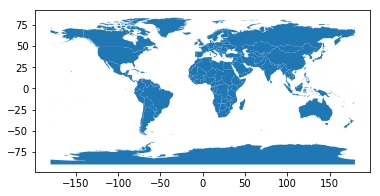

In [53]:
countriesshp = gpd.GeoDataFrame.from_file("TM_WORLD_BORDERS_SIMPL-0.3.shp")
                                    
aax = countriesshp.plot()
statetsshp = gpd.GeoDataFrame.from_file("cb_2016_us_state_500k.shp")
statetsshp.plot(ax=ax, color='red')


In [54]:
statetsshp.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,05,00068085,0400000US05,05,AR,Arkansas,00,134771517596,2960191698,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,06,01779778,0400000US06,06,CA,California,00,403501101370,20466718403,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [55]:
countriesshp["NAME"][["United" in cn for cn in  countriesshp["NAME"].values]]

150    United States Minor Outlying Islands
204             United Republic of Tanzania
206                          United Kingdom
208                           United States
216            United States Virgin Islands
227                    United Arab Emirates
Name: NAME, dtype: object

In [56]:
dfgroup = df_.drop_duplicates("Email").\
    groupby("country").count()[["Last Name"]].\
    rename(columns={"Last Name":"count"})

In [57]:
dfgroup.head()

,count
country,
Arizona,37
Austraalia,1
Australia,5
Brasil,7
California,95


In [58]:
countriesshp.merge(dfgroup, right_index=True, left_on="NAME")["count"].describe()

count    16.00000
mean     10.68750
std      18.78907
min       1.00000
25%       2.00000
50%       3.00000
75%       5.00000
max      67.00000
Name: count, dtype: float64

In [59]:
statetsshp.NAME

0                                          Alabama
1                                           Alaska
2                                          Arizona
3                                         Arkansas
4                                       California
5                                         Colorado
6                                      Connecticut
7                                         Delaware
8                             District of Columbia
9                                          Georgia
10                                          Hawaii
11                                           Idaho
12                                        Illinois
13                                         Indiana
14                                            Iowa
15                                          Kansas
16                                        Maryland
17                                       Minnesota
18                                     Mississippi
19                             

In [60]:
statetsshp.merge(dfgroup, right_index=True, left_on="NAME")["count"].describe()

count    32.000000
mean     11.562500
std      19.076987
min       1.000000
25%       2.000000
50%       4.000000
75%       9.250000
max      95.000000
Name: count, dtype: float64

In [61]:
df_.country[[v  == "UK" for v in df_.country.values]] = "United Kingdom"

/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
df_.country[[v  == "United Kingdom" for v in df_.country.values]]
df_.country[[v  == "DC" for v in df_.country.values]]

126    DC
161    DC
186    DC
232    DC
412    DC
413    DC
473    DC
686    DC
983    DC
Name: country, dtype: object

In [63]:
df_.country[[v  == "DC" for v in df_.country.values]] = "Maryland"

/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
i0 = df_[df_["Last Name"] == "Lochner"].index#,#["state5"] = "South Africa"
i1 = df_[df_["Last Name"] == "Buckley"].index#["state5"] = "South Africa"
df_.set_value(i0, 'country', "South Africa")
df_.set_value(i1, 'country', "South Africa")


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,Unnamed: 0,Company,Email,First Name,Last Name,SC,state,state1,state2,state3,state4,country
0,0,University of Washington,agol@astro.washington.edu,Eric,Agol,Transients and Variable Stars,Washington,Washington,NaN,Washington,Washington,Washington
1,1,NaN,javier.alonso@uantof.cl,Javier,Alonso-Garcia,Transients and Variable Stars,NaN,NaN,Chile,Chile,NaN,Chile
2,2,University of Washington,anderson@astro.washington.edu,Scott,Anderson,Transients and Variable Stars,Washington,Washington,NaN,Washington,Washington,Washington
3,3,Caltech,andreoni@caltech.edu,Igor,Andreoni,Transients and Variable Stars,Caltech,NaN,NaN,NaN,California,California
4,4,University of the Virgin Islands,antonino.cucchiara@uvi.edu,Cucchiara,Antonino,Transients and Variable Stars,the Virgin Islands,NaN,NaN,NaN,Virginia,Virginia
5,5,INAF - Osservatorio Astronomico di Roma,simone.antoniucci@inaf.it,Simone,Antoniucci,Transients and Variable Stars,INAF - Osservatorio Astronomico di Roma,NaN,Italy,Italy,NaN,Italy
6,6,LCOGT/UCSB,arcavi@gmail.com,Iair,Arcavi,Transients and Variable Stars,LCOGT/UCSB,NaN,NaN,NaN,NaN,NaN
7,7,University of Arizona,darnett@as.arizona.edu,David,Arnett,Transients and Variable Stars,Arizona,Arizona,NaN,Arizona,Arizona,Arizona
8,8,Las Cumbres Observatory,etibachelet@gmail.com,Etienne,Bachelet,Transients and Variable Stars,Las Cumbres Observatory,NaN,NaN,NaN,NaN,NaN
9,9,Northwestern University,adriano.baldeschi@northwestern.edu,Adriano,Baldeschi,Transients and Variable Stars,Northwestern University,NaN,NaN,NaN,Illinois,Illinois


In [65]:
df_.columns

Index(['Unnamed: 0', 'Company', 'Email', 'First Name', 'Last Name', 'SC',
       'state', 'state1', 'state2', 'state3', 'state4', 'country'],
      dtype='object')

In [66]:
df_[['Company', 'Email', 'First Name', 'Last Name', 'SC',
       'state']].to_csv("SCcontactDBmodifiedFBBAugust2020.csv", index=False)

In [67]:
df_.head()

,Unnamed: 0,Company,Email,First Name,Last Name,SC,state,state1,state2,state3,state4,country
0,0,University of Washington,agol@astro.washington.edu,Eric,Agol,Transients and Variable Stars,Washington,Washington,NaN,Washington,Washington,Washington
1,1,NaN,javier.alonso@uantof.cl,Javier,Alonso-Garcia,Transients and Variable Stars,NaN,NaN,Chile,Chile,NaN,Chile
2,2,University of Washington,anderson@astro.washington.edu,Scott,Anderson,Transients and Variable Stars,Washington,Washington,NaN,Washington,Washington,Washington
3,3,Caltech,andreoni@caltech.edu,Igor,Andreoni,Transients and Variable Stars,Caltech,NaN,NaN,NaN,California,California
4,4,University of the Virgin Islands,antonino.cucchiara@uvi.edu,Cucchiara,Antonino,Transients and Variable Stars,the Virgin Islands,NaN,NaN,NaN,Virginia,Virginia


In [68]:
df_.country.unique()

array(['Washington', 'Chile', 'California', 'Virginia', 'Italy', nan,
       'Arizona', 'Illinois', 'Germany', 'Massachusetts',
       'United Kingdom', 'Maryland', 'New York', 'Pennsylvania',
       'Slovenia', 'Texas', 'South Africa', 'Michigan', 'Ohio',
       'Louisiana', 'France', 'New Zealand', 'Delaware', 'Serbia',
       'New Jersey', 'Masachussets', 'Florida', 'Tennessee', 'Hungary',
       'Connecticut', 'Canada', 'Brasil', 'Wyoming', 'Colorado',
       'South Carolina', 'China', 'Kentucky', 'Australia', 'Rhode Island',
       'Hawaii', 'Czech Republic', 'Georgia', 'Missouri', 'Finland',
       'Oklahoma', 'Spain', 'Austraalia', 'Indiana', 'Utah', 'Nebraska',
       'Poland', 'New Hampshire', 'Danmark', 'North Carolina'],
      dtype=object)

In [69]:
dfgroup = df_.\
    groupby("country").count()[["Last Name"]].\
    rename(columns={"Last Name":"count"})

#.drop_duplicates("Email").\

In [70]:
dfgroup.sort_values("count")

,count
country,
Wyoming,1
Missouri,1
Nebraska,1
Hungary,1
New Hampshire,1
Poland,1
Finland,1
Danmark,1
Utah,1


In [71]:
dfgroup.index

Index(['Arizona', 'Austraalia', 'Australia', 'Brasil', 'California', 'Canada',
       'Chile', 'China', 'Colorado', 'Connecticut', 'Czech Republic',
       'Danmark', 'Delaware', 'Finland', 'Florida', 'France', 'Georgia',
       'Germany', 'Hawaii', 'Hungary', 'Illinois', 'Indiana', 'Italy',
       'Kentucky', 'Louisiana', 'Maryland', 'Masachussets', 'Massachusetts',
       'Michigan', 'Missouri', 'Nebraska', 'New Hampshire', 'New Jersey',
       'New York', 'New Zealand', 'North Carolina', 'Ohio', 'Oklahoma',
       'Pennsylvania', 'Poland', 'Rhode Island', 'Serbia', 'Slovenia',
       'South Africa', 'South Carolina', 'Spain', 'Tennessee', 'Texas',
       'United Kingdom', 'Utah', 'Virginia', 'Washington', 'Wyoming'],
      dtype='object', name='country')

In [73]:
'Arizona',  'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
'Georgia',
        'New Hampshire', 'Hawaii',  'Illinois', 'Indiana',
        'Kentucky', 'Louisiana', 'Maryland', 
       'Massachusetts', 'Michigan', 'Missouri', 'Nebraska', 'New Jersey',
       'New York',  'North Carolina', 'Ohio', 'Oklahoma',
       'Pennsylvania', 'Poland', 'Rhode Island',
       'South Carolina', 'Spain', 'Tennessee', 'Texas',
       'Utah', 'Virginia', 'Washington', 'Wyoming'

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

In [ ]:
logdfgroup = np.log10(dfgroup)

In [ ]:
logdfgroup

In [ ]:
statetsshp.merge(logdfgroup, right_index=True, left_on="NAME")

In [ ]:
countriesshp["centers"] = countriesshp.geometry.centroid
statetsshp["centers"] = statetsshp.geometry.centroid
allgeos = pd.concat([countriesshp[["NAME", "centers"]], statetsshp[["NAME", "centers"]]]).reset_index()

In [ ]:
logdfgroup + 10

In [ ]:
ax = countriesshp.plot(color="#fcfcfc", edgecolor="k", figsize=(20,20))
tmp_ = countriesshp.merge(logdfgroup+3, right_index=True, left_on="NAME", how='outer')
tmp_.fillna(0).plot(cmap="Blues",
                                                        column="count", ax=ax)
tmp_ = statetsshp.merge(logdfgroup+10, right_index=True, left_on="NAME", how='outer')
tmp_.fillna(0).plot(cmap="Oranges", 
                                                    column="count", ax=ax)
ax.axis('off')
pl.savefig("SCmap.png")


In [ ]:
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0.5, 1, 256))
newcolors

In [ ]:
allgeos['centers'].values[0]

In [ ]:
statetsshp.merge(dfgroup, right_index=True, left_on="NAME")[["NAME",'count']]

In [ ]:
statetsshp.merge(dfgroup, right_index=True, left_on="NAME")[["NAME",'count']]

In [ ]:
pd.options.display.max_rows = 999

In [ ]:
countriesshp.merge(dfgroup, right_index=True, left_on="NAME")[["NAME", "count"]]

In [74]:
allcontacts = pd.read_csv("contactdbexport.csv")
allcontacts["Company"].unique()

array(['Lawrence Livermore National Laboratory',
       'NASA Johnson Space Center', 'University of Washington', nan,
       'Columbia University', 'IAC', 'University of California',
       ' Berkeley/ LBNL',
       'Kavli Institute for Particle Astrophysics and Cosmology (KIPAC)',
       'SLAC National Accelerator Laboratory',
       'University of Southampton', 'University of Oxford',
       'Universidad de Antofagasta', ' Davis', 'Universidad Andres Bello',
       'Univ. Paris-Sud & LAL - IN2P3/CNRS', 'IN2P3-LPNHE',
       'INAF-Osservatorio Astronomico di Roma',
       'Universidad Diego Portales', 'LCOGT & UC Santa Barbara',
       'Jet Propulsion Laboratory', 'IPAC/Caltech',
       'The University of Arizona', 'APC', 'University of Chicago',
       'Rutgers',
       'Laboratory for Atmosphere and Space Physics University of Colorado at Boulder',
       'Pennsylvania State University',
       'Lawrence Berkeley National Laboratory', 'Yale University',
       'Georgia Institute of 

In [75]:
df_.head()

,Unnamed: 0,Company,Email,First Name,Last Name,SC,state,state1,state2,state3,state4,country
0,0,University of Washington,agol@astro.washington.edu,Eric,Agol,Transients and Variable Stars,Washington,Washington,NaN,Washington,Washington,Washington
1,1,NaN,javier.alonso@uantof.cl,Javier,Alonso-Garcia,Transients and Variable Stars,NaN,NaN,Chile,Chile,NaN,Chile
2,2,University of Washington,anderson@astro.washington.edu,Scott,Anderson,Transients and Variable Stars,Washington,Washington,NaN,Washington,Washington,Washington
3,3,Caltech,andreoni@caltech.edu,Igor,Andreoni,Transients and Variable Stars,Caltech,NaN,NaN,NaN,California,California
4,4,University of the Virgin Islands,antonino.cucchiara@uvi.edu,Cucchiara,Antonino,Transients and Variable Stars,the Virgin Islands,NaN,NaN,NaN,Virginia,Virginia


In [76]:
df_.head()

,Unnamed: 0,Company,Email,First Name,Last Name,SC,state,state1,state2,state3,state4,country
0,0,University of Washington,agol@astro.washington.edu,Eric,Agol,Transients and Variable Stars,Washington,Washington,NaN,Washington,Washington,Washington
1,1,NaN,javier.alonso@uantof.cl,Javier,Alonso-Garcia,Transients and Variable Stars,NaN,NaN,Chile,Chile,NaN,Chile
2,2,University of Washington,anderson@astro.washington.edu,Scott,Anderson,Transients and Variable Stars,Washington,Washington,NaN,Washington,Washington,Washington
3,3,Caltech,andreoni@caltech.edu,Igor,Andreoni,Transients and Variable Stars,Caltech,NaN,NaN,NaN,California,California
4,4,University of the Virgin Islands,antonino.cucchiara@uvi.edu,Cucchiara,Antonino,Transients and Variable Stars,the Virgin Islands,NaN,NaN,NaN,Virginia,Virginia


In [77]:
from shapely.geometry import LineString # To create line geometries that can be used in a GeoDataFrame
def makeline(g0, g1):
    #print(g0,g1)
    start, end = [(g0.x, g0.y), (g1.x, g1.y)]
    line = LineString([start, end]), start, end
    #data = {'geometry': [line]}
    #return gpd.GeoDataFrame(pd.DataFrame(data, 
           #                                 columns = ['geometry'])) 
    return line

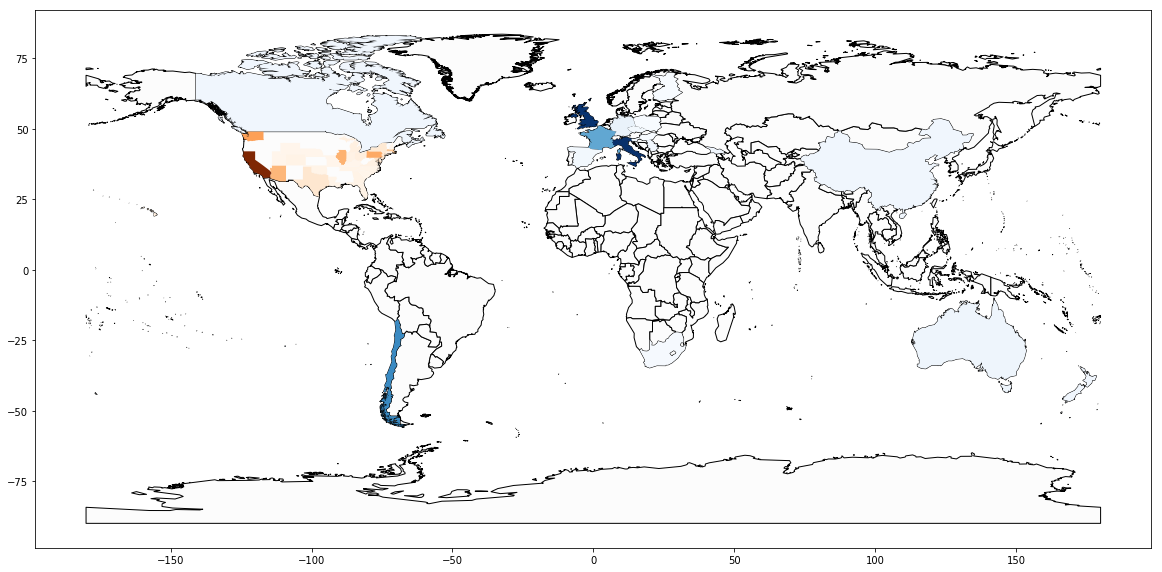

In [78]:
ax = countriesshp.plot(color="#fcfcfc", edgecolor="k", figsize=(20,20))
countriesshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="Blues",
                                                        column="count", ax=ax)
statetsshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="Oranges", 
                                                    column="count", ax=ax)
#ax.axis('off')
g0, g1 = countriesshp[countriesshp["NAME"] == "Brazil"]["geometry"].centroid.values[0],\
countriesshp[countriesshp["NAME"] == "Italy"]["geometry"].centroid.values[0]
#makeline(g0, g1).plot(ax=ax)
#pl.plot(countriesshp['centers'][0], countriesshp['centers'][1])
#countriesshp.head(), countriesshp['centers'][0], countriesshp['centers'][1]

In [79]:
def getlinks(pairs):
    #print(allgeos["centers"][allgeos["NAME"] == pairs[0]].values[0], 
    #      allgeos["centers"][allgeos["NAME"] == pairs[1]].values[0])
    #print((allgeos["NAME"] == pairs[0]).sum())
    #print((allgeos["NAME"] == pairs[1]).sum())
    return allgeos["centers"][allgeos["NAME"] == pairs[0]].values[0], \
allgeos["centers"][allgeos["NAME"] == pairs[1]].values[0]


def pairup(mylist):
    pairs = []
    for i,l1 in enumerate(mylist):
        for l2 in mylist[i+1:]:
            if (l1 in allgeos["NAME"].values and l2 in allgeos["NAME"].values):
                #print(l1, l2)
                pairs.append((l1, l2))
    pairs, k = np.unique(np.array(pairs), axis=0, return_counts=1)
    #print(pairs)#print([(p[0], p[1]) for p in pairs])
    return [getlinks((p[0], p[1])) for p in pairs], k




In [80]:
getlinks(("Alabama", "California"))

NameError: name 'allgeos' is not defined

In [ ]:
df_["SC"].unique()

In [ ]:
pairs = {}
for sc in df_["SC"].unique():
    pairs[sc] = []
    pairs[sc] = pairup(df_[df_.SC == sc]["country"].values)
    

In [ ]:
pairs.keys()

In [ ]:
ax = pl.figure(figsize=(20,20)).add_subplot(111)
countriesshp.plot(color="#fcfcfc", edgecolor="k", ax=ax)
countriesshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="Blues",
                                                        column="count", ax=ax)
statetsshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="Oranges", 
                                                    column="count", ax=ax)
colors = ['k', 'c', 'm', 'y', 'g', 'b', 'r']
for i,k in enumerate(pairs.keys()):
    print(k)
    for j,p in enumerate(pairs[k][0]):
        #print(p)
        try:
            makeline(p[0], p[1]).plot(ax=ax, alpha=0.01 * pairs[k][1][j], 
                                      color=colors[i])
        except:
            pass
pl.savefig("mapWnetwork.png")


In [ ]:
def plot_line(ax, ob, alpha, color):
    x, y = ob.xy
    #print(color, alpha)
    ax.annotate("",
                xy=(x[0],y[0]), xycoords='data',
                xytext=(x[1],y[1]), textcoords='data',
                arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3,rad=0.3",
                               ec=color, alpha=alpha),
                #color=color, alpha=alpha
                )
    
    #ax.plot(x, y, color=color, alpha=0.7, linewidth=1, solid_capstyle='round', zorder=2)

In [ ]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDrawingArea

fig, ax = pl.subplots(nrows=1, ncols=1,figsize=(20,10))
countriesshp.plot(color="#fcfcfc", edgecolor="k", ax=ax)
countriesshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="gray_r",
                                                        column="count", ax=ax)
statetsshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="gray", 
                                                    column="count", ax=ax)
colors = {"Transients and Variable Stars":"#44aa99", 'Solar System':"#332288", 
          'Strong Lensing':"#117733", 'DESC':"#cc6677", 
          'Galaxies':"#999933", 'AGN':"#882255", 
          'Stars, Milky Way, and Local Volume':"#88ccee", 
          'Statistics and Informatics':"#aa4499"}
pairslist = np.array(list(list(pairs.keys())))
pairsort = np.argsort([len(pairs[k][1]) 
                       for k in list(pairs.keys())])[::-1]
                    
l = 7
for i,k in enumerate(pairslist[pairsort]):
    print(k, len(pairs[k][1]))
    for j,p in enumerate(pairs[k][0]):
        #print(p, makeline(p[0], p[1])[0], 0.01 * pairs[k][1][j])
        if 1: #
        #try:
            #print(0.01 * pairs[k][1][j])
            #makeline(p[0], p[1]).plot(ax=ax, alpha=0.01 * pairs[k][1][j], 
            #                          color=colors[i])
            #print(makeline(p[0], p[1]))
            #pl.plot(makeline(p[0], p[1])[2], makeline(p[0], p[1])[1], alpha=0.01 * pairs[k][1][j], 
            #                          color=colors[i])
            alpha = 0.03 * pairs[k][1][j]
            #print(alpha)
            if k == "Stars, Milky Way, and Local Volume":
                alpha = alpha * 0.3
            alpha=max(0.02, min(1, alpha))
            plot_line(ax, makeline(p[0], p[1])[0], alpha=alpha, 
                                      color=colors[k])
            #print(makeline(p[0],p[1])[0])
            #makeline(p[0], p[1])[0]#.plot(ax=ax)
        #except:
        #    pass
    pl.plot(-180, -10*i, 'o', ms=10, color=colors[k])
    pl.text(-175, -10*i, k.replace("Stars, Milky Way, and Local Volume", 
                                  "SMWLV"), ha="left", va="center", fontsize=20)
    #break
ax.axis('off');
pl.savefig("SCmapWNet.png")


In [ ]:
#statetsshp.merge(dfgroup, right_index=True, left_on="NAME").head()
dfgroup2 = dfgroup.copy()
dfgroup2["state6"] = dfgroup2.index
dfgroup2 = dfgroup2.reset_index().set_index(["country"])["state6"].repeat(dfgroup['count']).reset_index()#

In [ ]:
dfgroup2

In [ ]:
statetsshp.head()

In [ ]:
def tr(x):
    return x.coords.xy[0][0]#, x.centers.coords.xy[1][0]
def tr1(x):
    return x.coords.xy[1][0]#, x.centers.coords.xy[1][0]
statetsshp["coords0"] = statetsshp["centers"].transform(tr)
statetsshp["coords1"] = statetsshp["centers"].transform(tr1)
    

In [ ]:
dfnow = statetsshp.merge(dfgroup2, right_on="state5", left_on="NAME")[["coords0", "coords1"]]#.plot(cmap="gray", 
                                                    #column="count", ax=ax)


In [ ]:
import datashader as ds
import datashader.transfer_functions as tf
import dask.dataframe as dd
import numpy as np


In [ ]:

from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9
from IPython.core.display import HTML, display

export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

display(HTML("<style>.container { width:100% !important; }</style>"))

world, USA

In [ ]:
world           = ((-180, 180), (-180,  180) )
USA           = ((-124.72,  -66.95), (23.55, 50.06))
background = "gray"
from datashader.utils import lnglat_to_meters as webm
x_range,y_range = [list(r) for r in USA]

plot_width  = int(900)
plot_height = int(plot_width*7.0/12)


In [ ]:
cvs = ds.Canvas(plot_width, plot_height, *USA)#*webm(*world))
agg = cvs.points(dfnow, 'coords0', 'coords1')
#dfnow[['coords0', 'coords1']]

In [ ]:
agg.data.flatten()[agg.data.flatten()>0]

In [ ]:
pl.hist(np.log(agg).data.flatten())

In [ ]:
color_key = {'w':'blue', 'b':'green', 'a':'red', 'h':'orange',  'o':'saddlebrown'}
from matplotlib.cm import hot
x_range,y_range=webm(np.array([-180,0]), np.array([-180,180]))
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
agg = cvs.points(dfnow, 'coords0', 'coords1')
agg.data = agg.data+1
export(tf.shade(agg, color_key=color_key, how='eq_hist'), "tmp")
    

In [ ]:
tf.shade(np.log(agg), cmap=plt.get_cmap('viridis'), how='linear')

In [ ]:
agg.data.sum()

In [ ]:
dfnow["coords0"]

In [ ]:
cvs.points(dfnow, "coords0","coords1", agg=None)